# Предиктивный анализ износа колёс локомотивов

In [16]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('../Data/depo-measurements.csv')
df_test = pd.read_csv('../Data/depo-features-test.csv')

In [18]:
df.shape

(32812, 8)

In [19]:
df.dtypes

wheel_id            int64
flange_height     float64
flange_width      float64
qr                float64
tread_wear        float64
rim_thickness     float64
wheel_diameter    float64
date                int64
dtype: object

In [26]:
df.head(10)

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61
1,8608,31.34,31.71,10.42,1.34,57.23,1184.46,61
2,8609,31.30,30.85,8.36,1.30,56.35,1182.70,61
3,8612,31.24,28.07,8.74,1.24,73.01,1216.03,61
4,8613,30.42,29.37,10.13,0.42,72.05,1214.11,61
5,8614,32.50,28.49,7.79,2.50,76.67,1223.35,61
6,8615,28.08,30.09,8.27,-1.92,75.21,1220.41,61
7,8616,32.22,30.33,9.43,2.22,73.73,1217.45,61
8,8625,30.60,31.17,10.51,0.60,70.12,1210.24,61
9,8618,30.42,31.86,10.66,0.42,79.10,1228.20,61


In [21]:
df_test.shape

(668, 4)

In [15]:
df_test.head(10)

,previous_flange_width,previous_flange_height,previous_rim_thickness,previous_wheel_diameter
0,29.57,31.68,88.73,0.00
1,31.29,34.42,85.96,1241.92
2,30.64,33.60,66.04,1202.08
3,29.46,33.35,0.00,0.00
4,28.68,30.80,69.42,0.00
5,32.95,29.71,90.20,1250.40
6,29.34,35.11,74.49,1218.98
7,25.03,35.90,85.95,1239.00
8,28.96,31.20,69.25,1201.00
9,32.77,29.25,50.49,1170.98


In [22]:
len(df.wheel_id.unique())

14576

In [72]:
df.wheel_id.unique()[:20]

array([1331, 8608, 8609, 8612, 8613, 8614, 8615, 8616, 8625, 8618, 8619,
       8620, 8621, 8622, 8623, 8626, 8607, 8606, 8605, 8604], dtype=int64)

In [7]:
df[ df.wheel_id == 1331 ]

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66
3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110
4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117
6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145
17030,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145
17045,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145
17071,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145
17405,1331,32.60,29.02,11.13,0.27,69.74,0.00,146


In [13]:
df_wheels = {}
for wheel_id in df.wheel_id.unique():
    df_wheels[wheel_id] = df[ df.wheel_id == wheel_id ]

In [45]:
np.arange(len(df))

array([    0,     1,     2, ..., 32809, 32810, 32811])

In [51]:
df['previous_flange_height'] = 0
df['previous_flange_width'] = 0
df['previous_qr'] = 0
df['previous_tread_wear'] = 0
df['previous_rim_thickness'] = 0
df['previous_wheel_diameter'] = 0

In [52]:
df.head()

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0,0,0,0,0,0
1,8608,31.34,31.71,10.42,1.34,57.23,1184.46,61,0,0,0,0,0,0
2,8609,31.30,30.85,8.36,1.30,56.35,1182.70,61,0,0,0,0,0,0
3,8612,31.24,28.07,8.74,1.24,73.01,1216.03,61,0,0,0,0,0,0
4,8613,30.42,29.37,10.13,0.42,72.05,1214.11,61,0,0,0,0,0,0


In [53]:
df_wheel = df[ df.wheel_id == 1331 ]
prev_index = -1
for index, row in df_wheel.iterrows():
    if prev_index == -1:
        prev_index = index
        continue
    
    df_wheel.loc[index, 'previous_flange_height'] = df_wheel.loc[prev_index, 'flange_height']
    df_wheel.loc[index, 'previous_flange_width'] = df_wheel.loc[prev_index, 'flange_width']
    df_wheel.loc[index, 'previous_qr'] = df_wheel.loc[prev_index, 'qr']
    df_wheel.loc[index, 'previous_tread_wear'] = df_wheel.loc[prev_index, 'tread_wear']
    df_wheel.loc[index, 'previous_rim_thickness'] = df_wheel.loc[prev_index, 'rim_thickness']
    df_wheel.loc[index, 'previous_wheel_diameter'] = df_wheel.loc[prev_index, 'wheel_diameter']
    prev_index = index

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [55]:
df_wheel

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.00,0.00,0.00,0.00,0.00
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66,32.27,30.08,10.52,2.27,75.25,1220.50
3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110,33.09,28.78,9.69,3.09,66.79,1203.58
4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117,34.26,28.81,11.17,4.26,75.99,1221.97
6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121,28.24,29.78,8.48,0.29,65.83,1201.66
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,34.34,28.56,11.19,4.34,78.20,1226.40
17030,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,34.96,28.07,11.13,4.96,74.47,1217.44
17045,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,34.96,28.07,11.13,4.96,74.47,1221.26
17071,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,34.96,28.07,11.13,4.96,74.47,1221.26
17405,1331,32.60,29.02,11.13,0.27,69.74,0.00,146,34.96,28.07,11.13,4.96,74.47,1217.44


In [59]:
df_new = pd.DataFrame(columns = df.columns)
df_new.head()

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter


In [60]:
for wheel_id in df.wheel_id.unique():
    df_wheel = df[ df.wheel_id == wheel_id ]
    prev_index = -1
    for index, row in df_wheel.iterrows():
        if prev_index == -1:
            prev_index = index
            continue

        df_wheel.loc[index, 'previous_flange_height'] = df_wheel.loc[prev_index, 'flange_height']
        df_wheel.loc[index, 'previous_flange_width'] = df_wheel.loc[prev_index, 'flange_width']
        df_wheel.loc[index, 'previous_qr'] = df_wheel.loc[prev_index, 'qr']
        df_wheel.loc[index, 'previous_tread_wear'] = df_wheel.loc[prev_index, 'tread_wear']
        df_wheel.loc[index, 'previous_rim_thickness'] = df_wheel.loc[prev_index, 'rim_thickness']
        df_wheel.loc[index, 'previous_wheel_diameter'] = df_wheel.loc[prev_index, 'wheel_diameter']
        prev_index = index
    
    df_new = pd.concat([df_new, df_wheel])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
df_new.shape
df_new.head(20)

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.00,0.00,0.00,0.00,0.00
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66,32.27,30.08,10.52,2.27,75.25,1220.50
3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110,33.09,28.78,9.69,3.09,66.79,1203.58
4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117,34.26,28.81,11.17,4.26,75.99,1221.97
6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121,28.24,29.78,8.48,0.29,65.83,1201.66
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,34.34,28.56,11.19,4.34,78.20,1226.40
17030,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,34.96,28.07,11.13,4.96,74.47,1217.44
17045,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,34.96,28.07,11.13,4.96,74.47,1221.26
17071,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,34.96,28.07,11.13,4.96,74.47,1221.26
17405,1331,32.60,29.02,11.13,0.27,69.74,0.00,146,34.96,28.07,11.13,4.96,74.47,1217.44


9


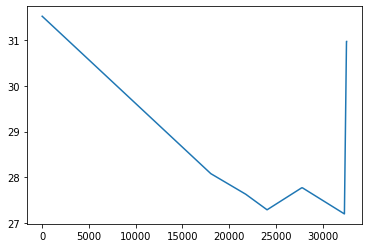

In [85]:
df_wheel = df[ df.wheel_id == 8622 ]
print(len(df_wheel))
df_wheel['flange_width'].plot()

In [86]:
df_wheel

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
13,8622,30.29,31.52,11.03,0.29,72.45,1214.90,61,0,0,0,0,0,0
18048,8622,30.52,28.08,8.30,0.52,69.83,1208.71,148,0,0,0,0,0,0
21782,8622,30.56,27.63,8.19,0.56,70.43,0.00,158,0,0,0,0,0,0
24062,8622,30.69,27.29,7.93,0.69,70.83,0.00,169,0,0,0,0,0,0
27761,8622,30.52,27.77,9.00,0.52,65.16,0.00,186,0,0,0,0,0,0
27847,8622,30.52,27.77,9.00,0.52,65.16,0.00,186,0,0,0,0,0,0
32333,8622,30.62,27.20,8.53,0.62,64.36,0.00,207,0,0,0,0,0,0
32554,8622,29.99,30.97,9.88,-0.01,58.39,0.00,210,0,0,0,0,0,0
32559,8622,29.99,30.97,9.88,-0.01,58.39,0.00,210,0,0,0,0,0,0


In [78]:
len(df_new[ df_new.previous_flange_height == 0 ])

14583

In [88]:
df_wheel = df[ df.wheel_id == 8622 ]

prev_index = -1
for index, row in df_wheel.iterrows():
    if prev_index == -1:
        prev_index = index
        continue

    if (df_wheel.loc[prev_index, 'flange_width'] < df_wheel.loc[index, 'previous_flange_width']):
        print(index)